#  Building a Custom Visualization

Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

 Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
from scipy.stats import norm
import numpy as np
# norm.ppf(0.975)

In [3]:
df['mean']=df.T.mean().T
df['std']=df.T.std().T
# df['sem']=df.T.sem()
df['unbaised_standard_error']=df['std']/((len(df.T)-1)**0.5 )
df['yerror']=df['unbaised_standard_error']*2


df['y_max']=df['mean']+df['yerror']
df['y_min']=df['mean']-df['yerror']

df=df.loc[ : , ['mean','std', 'unbaised_standard_error','yerror','y_min','y_max']]

df=df.reset_index()
df

,index,mean,std,unbaised_standard_error,yerror,y_min,y_max
0,1992,33312.107476,200603.415985,3319.956609,6639.913219,26672.194257,39952.020694
1,1993,41861.859541,98384.876053,1628.255022,3256.510044,38605.349497,45118.369585
2,1994,39493.304941,140350.695166,2322.783068,4645.566136,34847.738805,44138.871078
3,1995,47743.550969,69771.625748,1154.709998,2309.419996,45434.130973,50052.970965


<IPython.core.display.Javascript object>


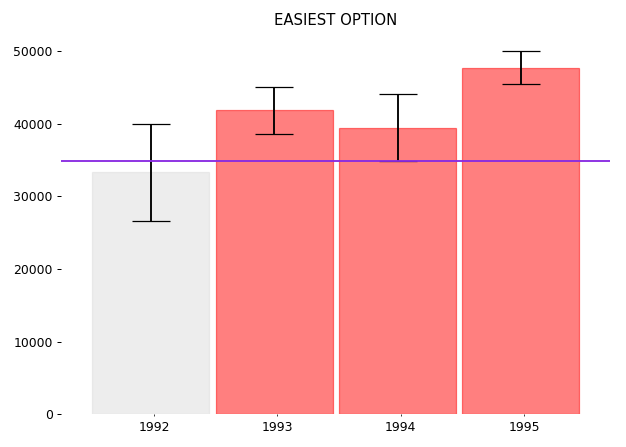

7

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

cl_max_color='red'
cl_min_color='blue'
cl_neutral_color='gainsboro'
cl_initial_color='seagreen'

class Cursor(object):
    _df=None
    _bl=None
    def __init__(self, ax, data_F, bars):
        self._df=data_F
        self._bl=bars
        self.ax = ax
        self.lx = ax.axhline(color='blueviolet')

    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['y_max']<y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_min_color)
                continue
            if row['y_min']>y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_max_color)
                continue
            
            self._bl[self._df.index.get_loc(index)].set_color(cl_neutral_color)
        plt.draw()

        
def plot_base( ):
    
    ax=df['mean'].plot.bar(yerr=df['yerror'],title = 'EASIEST OPTION', figsize=( 7,5), capsize=15,
    legend=False, fontsize=10, alpha=0.5 , width=0.95,rot=0, position=0, style='-', color=cl_initial_color)
    
#     plt.xticks([1992,1993,1994,199])

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    minors = [0.5,1.5,2.5, 3.5]
    ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter([1992,1993,1994,1995]))
    ax.xaxis.set_major_locator(ticker.NullLocator())

    plt.tight_layout()
    
    return (ax, ax.get_children()[1:5])

ax, barlist=plot_base( )

cursor = Cursor(ax, df, barlist)
plt.connect('motion_notify_event', cursor.mouse_move)
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

cl_max_color='red'
cl_min_color='blue'
cl_neutral_color='gainsboro'
cl_initial_color='seagreen'

class Cursor(object):
    _df=None
    _bl=None
    def __init__(self, ax, data_F, bars):
        self._df=data_F
        self._bl=bars
        self.ax = ax
        self.lx = ax.axhline(color='blueviolet')

    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['y_max']<y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_min_color)
                continue
            if row['y_min']>y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_max_color)
                continue
            
            self._bl[self._df.index.get_loc(index)].set_color(cl_neutral_color)
        plt.draw()

        
def plot_base( ):
    
    ax=df['mean'].plot.bar(yerr=df['yerror'],title = 'EASIEST OPTION', figsize=( 7,5), capsize=15,
    legend=False, fontsize=10, alpha=0.5 , width=0.95,rot=0, position=0, style='-', color=cl_initial_color)
    
#     plt.xticks([1992,1993,1994,199])

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    minors = [0.5,1.5,2.5, 3.5]
    ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter([1992,1993,1994,1995]))
    ax.xaxis.set_major_locator(ticker.NullLocator())

    plt.tight_layout()
    
    return (ax, ax.get_children()[1:5])

ax, barlist=plot_base( )

cursor = Cursor(ax, df, barlist)
plt.connect('motion_notify_event', cursor.mouse_move)


In [5]:
plt.savefig('ErrorPlot.png')